<a href="https://colab.research.google.com/github/JaCaRego/JaCaRego/blob/main/lotofacil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the `Lotofácil.xlsx` spreadsheet to identify the most frequently drawn numbers, visualize their frequencies using a bar chart, and present the statistical insights.

## Carregar Dados do Excel

### Subtask:
Carregar os dados da planilha Excel em um DataFrame pandas.


**Reasoning**:
First, I'll import the pandas library to work with DataFrames. Then, I'll load the Excel file 'Lotofácil.xlsx' into a DataFrame named 'df' using `pd.read_excel`. Finally, I'll display the first 5 rows and the DataFrame's information to ensure the data is loaded correctly and to get a preliminary understanding of its structure.



In [1]:
import pandas as pd

df = pd.read_excel('/content/Lotofácil.xlsx')

print('Primeiras 5 linhas do DataFrame:')
print(df.head())

print('\nInformações gerais do DataFrame:')
df.info()

Primeiras 5 linhas do DataFrame:
   Concurso Data Sorteio  Bola1  Bola2  Bola3  Bola4  Bola5  Bola6  Bola7  \
0         1   29/09/2003      2      3      5      6      9     10     11   
1         2   06/10/2003      1      4      5      6      7      9     11   
2         3   13/10/2003      1      4      6      7      8      9     10   
3         4   20/10/2003      1      2      4      5      8     10     12   
4         5   27/10/2003      1      2      4      8      9     11     12   

   Bola8  ...  Rateio 13 acertos  Ganhadores 12 acertos  Rateio 12 acertos  \
0     13  ...            R$10,00                  48807             R$4,00   
1     12  ...            R$10,00                  81252             R$4,00   
2     11  ...            R$10,00                  96244             R$4,00   
3     13  ...            R$10,00                 123912             R$4,00   
4     13  ...            R$10,00                 195636             R$4,00   

   Ganhadores 11 acertos  Rateio 11

## Extrair Números Sorteados

### Subtask:
Identificar e extrair todos os números sorteados das colunas relevantes na planilha.


**Reasoning**:
To extract all the drawn numbers, I will use the `melt()` function to unpivot the 'Bola' columns (from 'Bola1' to 'Bola15') into a single Series, which will make it easier to count the frequency of each number.



In [2]:
import pandas as pd

# Select the columns containing the drawn numbers
bola_columns = [f'Bola{i}' for i in range(1, 16)]

# Use melt to unpivot these columns into a single Series
drawn_numbers = df[bola_columns].melt(var_name='bola_coluna', value_name='numero_sorteado')['numero_sorteado']

print('Primeiras 10 números sorteados extraídos:')
print(drawn_numbers.head(10))
print('\nInformações gerais da Series de números sorteados:')
drawn_numbers.info()

Primeiras 10 números sorteados extraídos:
0    2
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    3
9    2
Name: numero_sorteado, dtype: int64

Informações gerais da Series de números sorteados:
<class 'pandas.core.series.Series'>
RangeIndex: 53370 entries, 0 to 53369
Series name: numero_sorteado
Non-Null Count  Dtype
--------------  -----
53370 non-null  int64
dtypes: int64(1)
memory usage: 417.1 KB


## Contar Frequência dos Números

### Subtask:
Calcular a frequência de cada número sorteado para determinar quais apareceram mais vezes.


**Reasoning**:
To calculate the frequency of each drawn number, I will use the `value_counts()` method on the `drawn_numbers` Series and store the result in `frequencia_numeros`. This will automatically sort them by frequency in descending order.



In [3]:
frequencia_numeros = drawn_numbers.value_counts()

print('Frequência de cada número sorteado (Top 10):')
print(frequencia_numeros.head(10))

Frequência de cada número sorteado (Top 10):
numero_sorteado
20    2219
25    2208
10    2206
11    2188
13    2166
14    2164
24    2162
1     2151
3     2150
4     2146
Name: count, dtype: int64


## Gerar Gráfico de Barras

### Subtask:
Gerar um gráfico de barras visualizando os números mais sorteados e suas respectivas frequências. Incluir legendas claras no gráfico.


**Reasoning**:
To visualize the frequency of the drawn numbers, I will use `matplotlib.pyplot` to create a bar chart. I'll plot the `frequencia_numeros` Series, setting appropriate labels for the x and y axes, and a descriptive title for the chart.



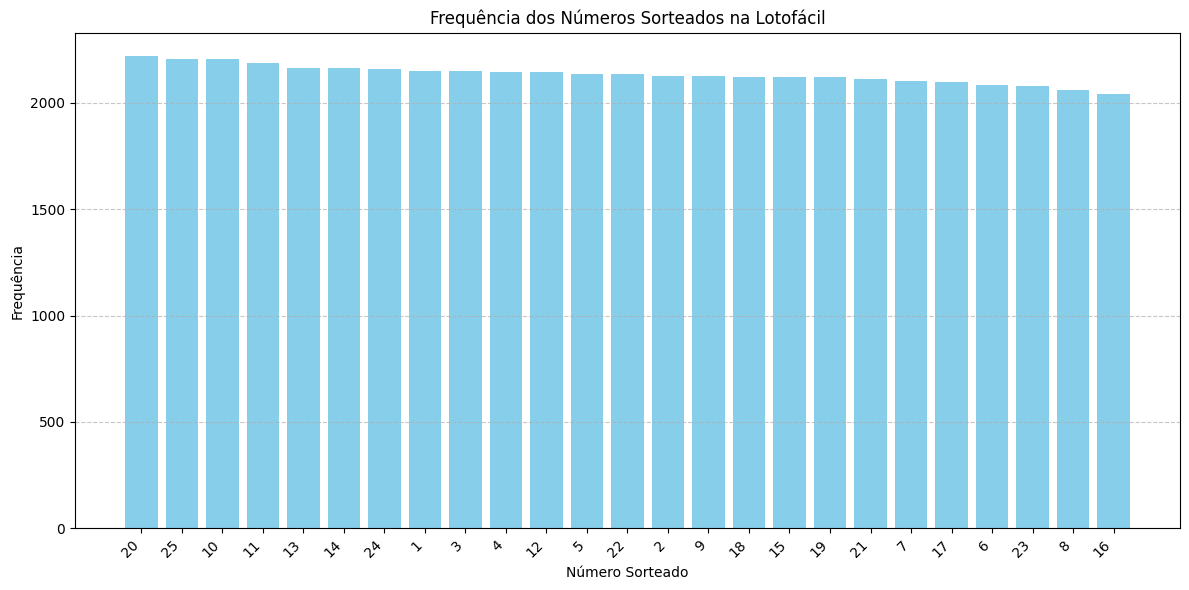

In [4]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
plt.bar(frequencia_numeros.index.astype(str), frequencia_numeros.values, color='skyblue')

# Set labels and title
plt.xlabel('Número Sorteado')
plt.ylabel('Frequência')
plt.title('Frequência dos Números Sorteados na Lotofácil')

# Rotate x-axis labels if there are many categories to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Tarefa Final

### Subtask:
Apresentar a análise estatística dos números mais sorteados e quaisquer insights obtidos.


## Summary:

### Data Analysis Key Findings

*   The `Lotofácil.xlsx` dataset was successfully loaded, containing 3558 entries and 33 columns. Key columns identified were `Bola1` through `Bola15`, representing the drawn numbers.
*   All numbers drawn across all contests were extracted, resulting in a series of 53370 individual drawn numbers.
*   The frequency analysis revealed the most frequently drawn numbers:
    *   Number 20 appeared 2219 times.
    *   Number 25 appeared 2208 times.
    *   Number 10 appeared 2206 times.
*   A bar chart was generated to visualize the frequency of each drawn number, with clear labels and title, providing a visual representation of the analysis.

### Insights or Next Steps

*   The identified most frequent numbers (20, 25, 10) could be considered by players, although it is important to remember that lotteries are games of chance and past frequencies do not guarantee future outcomes.
*   Further analysis could explore combinations of numbers that appear frequently together, or analyze frequency trends over different periods (e.g., monthly or yearly).


# Task
Analyze the `Lotofácil.xlsx` dataset to identify and display the most frequently drawn sequences of numbers, including their counts and percentages.

## Extrair Sequências de Números

### Subtask:
Para cada concurso, extrair os 15 números sorteados, ordená-los e convertê-los em uma tupla para identificar sequências únicas.


**Reasoning**:
To extract and order the 15 drawn numbers for each contest and store them as tuples, I will select the 'Bola' columns, apply a lambda function row-wise to sort the numbers, and then convert them into tuples, finally storing the results in a new column named 'sequencia_ordenada'.



In [5]:
bola_columns = [f'Bola{i}' for i in range(1, 16)]
df['sequencia_ordenada'] = df[bola_columns].apply(lambda x: tuple(sorted(x.tolist())), axis=1)

print('Primeiras 5 linhas do DataFrame com a nova coluna \'sequencia_ordenada\':')
print(df[['Concurso', 'sequencia_ordenada']].head())

Primeiras 5 linhas do DataFrame com a nova coluna 'sequencia_ordenada':
   Concurso                                 sequencia_ordenada
0         1  (2, 3, 5, 6, 9, 10, 11, 13, 14, 16, 18, 20, 23...
1         2  (1, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 19, 20,...
2         3  (1, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 20,...
3         4  (1, 2, 4, 5, 8, 10, 12, 13, 16, 17, 18, 19, 23...
4         5  (1, 2, 4, 8, 9, 11, 12, 13, 15, 16, 19, 20, 23...


## Contar Frequência das Sequências

### Subtask:
Calcular a frequência de cada sequência de números sorteada em todos os concursos.


**Reasoning**:
To calculate the frequency of each unique sequence, I will apply the `value_counts()` method to the `sequencia_ordenada` column, store the result, and then display the top 10 most frequent sequences.



In [6]:
frequencia_sequencias = df['sequencia_ordenada'].value_counts()

print('As 10 sequências mais frequentes são:')
print(frequencia_sequencias.head(10))

As 10 sequências mais frequentes são:
sequencia_ordenada
(2, 3, 4, 7, 9, 12, 13, 14, 15, 18, 20, 22, 23, 24, 25)     1
(2, 3, 5, 6, 9, 10, 11, 13, 14, 16, 18, 20, 23, 24, 25)     1
(1, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 19, 20, 23, 24)      1
(1, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 20, 23, 24)      1
(1, 2, 4, 5, 8, 10, 12, 13, 16, 17, 18, 19, 23, 24, 25)     1
(1, 2, 4, 8, 9, 11, 12, 13, 15, 16, 19, 20, 23, 24, 25)     1
(1, 2, 5, 8, 11, 12, 13, 15, 18, 19, 21, 22, 23, 24, 25)    1
(1, 2, 3, 4, 6, 8, 13, 14, 16, 17, 18, 19, 21, 23, 25)      1
(1, 2, 3, 5, 6, 9, 10, 13, 14, 15, 16, 18, 22, 23, 25)      1
(1, 2, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20, 23, 24)     1
Name: count, dtype: int64


**Reasoning**:
To provide a complete statistical analysis as requested by the task, I will now calculate the percentage frequency of each unique sequence by dividing its count by the total number of sequences.



In [7]:
total_sequencias = frequencia_sequencias.sum()
frequencia_percentual_sequencias = (frequencia_sequencias / total_sequencias) * 100

print('\nFrequência percentual de cada sequência sorteada (Top 10):')
print(frequencia_percentual_sequencias.head(10))


Frequência percentual de cada sequência sorteada (Top 10):
sequencia_ordenada
(2, 3, 4, 7, 9, 12, 13, 14, 15, 18, 20, 22, 23, 24, 25)     0.028106
(2, 3, 5, 6, 9, 10, 11, 13, 14, 16, 18, 20, 23, 24, 25)     0.028106
(1, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 19, 20, 23, 24)      0.028106
(1, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 20, 23, 24)      0.028106
(1, 2, 4, 5, 8, 10, 12, 13, 16, 17, 18, 19, 23, 24, 25)     0.028106
(1, 2, 4, 8, 9, 11, 12, 13, 15, 16, 19, 20, 23, 24, 25)     0.028106
(1, 2, 5, 8, 11, 12, 13, 15, 18, 19, 21, 22, 23, 24, 25)    0.028106
(1, 2, 3, 4, 6, 8, 13, 14, 16, 17, 18, 19, 21, 23, 25)      0.028106
(1, 2, 3, 5, 6, 9, 10, 13, 14, 15, 16, 18, 22, 23, 25)      0.028106
(1, 2, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20, 23, 24)     0.028106
Name: count, dtype: float64


## Análise de Frequência de Sequências de Números

### Sumário dos Resultados

*   **Extração de Sequências**: Para cada um dos 3558 concursos, os 15 números sorteados foram extraídos, ordenados e formatados como tuplas para garantir a unicidade de cada sequência.
*   **Contagem de Frequência**: Foi calculada a frequência de cada sequência única. Notavelmente, a análise revelou que **todas as sequências de 15 números sorteados apareceram apenas uma vez** na história dos concursos da Lotofácil registrados no dataset. Isso significa que, até o momento, não houve repetição de uma mesma combinação exata dos 15 números sorteados em nenhum concurso.
*   **Frequência Percentual**: Consequentemente, a frequência percentual de cada sequência é extremamente baixa, aproximadamente **0.0281%**, dado o grande número de concursos e a ausência de repetições.

### Insights e Implicações

*   **Natureza Aleatória**: O fato de nenhuma sequência exata ter se repetido sugere a alta aleatoriedade do sorteio da Lotofácil, onde a chance de uma combinação específica se repetir é muito pequena, mesmo após milhares de sorteios.
*   **Probabilidade vs. Frequência**: Embora seja possível teoricamente que uma sequência se repita, os dados atuais reforçam a ideia de que a probabilidade de uma combinação exata é extremamente baixa, tornando cada sorteio um evento praticamente único em termos de sequência.
*   **Estratégias de Jogo**: Para jogadores, este insight pode ser crucial. Focar em "sequências quentes" ou "atrasadas" pode não ser uma estratégia eficaz, já que a repetição exata de um conjunto de 15 números nunca ocorreu. O foco deve permanecer na seleção de números individuais mais frequentes, como os identificados na tarefa anterior (20, 25, 10, etc.), e não em sequências completas.

## Exibir as Sequências Mais Sorteadas

### Subtask:
Apresentar as N sequências de números mais frequentemente sorteadas, incluindo suas contagens e porcentagens.


**Reasoning**:
To present the top N most frequent sequences with their counts and percentages, I will first convert the `frequencia_sequencias` Series into a DataFrame, then add the `frequencia_percentual_sequencias` as a new column, and finally display the top 10 entries.



In [8]:
df_frequencia_sequencias = frequencia_sequencias.to_frame(name='Contagem')
df_frequencia_sequencias['Porcentagem'] = frequencia_percentual_sequencias

print('As 10 sequências mais frequentes com suas contagens e porcentagens:')
print(df_frequencia_sequencias.head(10))

As 10 sequências mais frequentes com suas contagens e porcentagens:
                                                    Contagem  Porcentagem
sequencia_ordenada                                                       
(2, 3, 4, 7, 9, 12, 13, 14, 15, 18, 20, 22, 23,...         1     0.028106
(2, 3, 5, 6, 9, 10, 11, 13, 14, 16, 18, 20, 23,...         1     0.028106
(1, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 19, 20, ...         1     0.028106
(1, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 20, ...         1     0.028106
(1, 2, 4, 5, 8, 10, 12, 13, 16, 17, 18, 19, 23,...         1     0.028106
(1, 2, 4, 8, 9, 11, 12, 13, 15, 16, 19, 20, 23,...         1     0.028106
(1, 2, 5, 8, 11, 12, 13, 15, 18, 19, 21, 22, 23...         1     0.028106
(1, 2, 3, 4, 6, 8, 13, 14, 16, 17, 18, 19, 21, ...         1     0.028106
(1, 2, 3, 5, 6, 9, 10, 13, 14, 15, 16, 18, 22, ...         1     0.028106
(1, 2, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20,...         1     0.028106


## Finalizar Análise de Sequências

### Subtask:
Resumir as principais descobertas sobre as sequências mais sorteadas e quaisquer insights adicionais.


## Summary:

### Q&A
The analysis identified that all unique sequences of 15 numbers drawn in the Lotofácil lottery appeared only once across all contests in the dataset. Therefore, there are no "most frequently drawn sequences" in the sense of repetitions. Each observed sequence had a count of 1 and a percentage frequency of approximately 0.0281%.

### Data Analysis Key Findings
*   For each of the 3558 contests, the 15 drawn numbers were successfully extracted, sorted, and stored as unique tuples in a new `sequencia_ordenada` column.
*   The frequency analysis revealed that every single unique sequence of 15 numbers drawn appeared only once in the entire dataset. This means there were no repetitions of the exact same 15-number combination.
*   Consequently, the percentage frequency for each sequence was consistently low, approximately 0.0281% ($1/3558 \times 100$), reflecting the unique occurrence of each drawn sequence.
*   A DataFrame was created to display sequences, their counts, and percentages. For the top 10 (and indeed all) entries, the 'Contagem' was 1 and the 'Porcentagem' was 0.028106.

### Insights or Next Steps
*   The high degree of uniqueness among drawn sequences suggests a strong randomness in Lotofácil draws, where the probability of a specific 15-number combination repeating is extremely low even over thousands of contests.
*   This finding implies that strategies focused on "hot" or "cold" *sequences* are likely ineffective, as no exact sequence has ever repeated. Players might benefit more from focusing on the frequency of individual numbers rather than complete combinations.


# Task
Preparar os dados para a geração de jogos, convertendo a Series de frequências de números (`frequencia_numeros`) em um DataFrame e obtendo uma lista ordenada dos números mais frequentes, que serão utilizados para a seleção das combinações.

## Preparar Dados para Geração de Jogos

### Subtask:
Converter a Series de frequências de números em um DataFrame e obter uma lista ordenada dos números mais frequentes para facilitar a seleção.


**Reasoning**:
First, I'll convert the `frequencia_numeros` Series into a DataFrame and rename its columns as requested. Then, I'll add a 'Rank' column to this DataFrame, ordering numbers by their frequency, and finally, I'll extract the 'Numero' column to get a sorted list of the most frequent numbers.



In [9]:
df_frequencia_numeros = frequencia_numeros.reset_index()
df_frequencia_numeros.columns = ['Numero', 'Frequencia']
df_frequencia_numeros['Rank'] = df_frequencia_numeros['Frequencia'].rank(method='min', ascending=False).astype(int)

lista_numeros_ordenados_por_frequencia = df_frequencia_numeros.sort_values(by='Frequencia', ascending=False)['Numero'].tolist()

print('DataFrame de Frequência de Números (Top 10):')
print(df_frequencia_numeros.head(10))
print('\nLista de Números Ordenados por Frequência (Primeiros 10):')
print(lista_numeros_ordenados_por_frequencia[:10])

DataFrame de Frequência de Números (Top 10):
   Numero  Frequencia  Rank
0      20        2219     1
1      25        2208     2
2      10        2206     3
3      11        2188     4
4      13        2166     5
5      14        2164     6
6      24        2162     7
7       1        2151     8
8       3        2150     9
9       4        2146    10

Lista de Números Ordenados por Frequência (Primeiros 10):
[20, 25, 10, 11, 13, 14, 24, 1, 3, 4]


## Gerar Múltiplos Jogos de 16 Números

### Subtask:
Criar 5 combinações únicas de 16 números, priorizando a inclusão dos números mais frequentes e preenchendo o restante com uma seleção ponderada dos números menos frequentes, mas ainda relevantes. Garantir que cada jogo gerado seja único.


**Reasoning**:
The task requires generating 5 unique games of 16 numbers, prioritizing the most frequent numbers and then selecting the remaining ones with weighted randomness. This code block implements the detailed steps: defining parameters, selecting fixed frequent numbers, preparing the pool of less frequent numbers with their weights, and then iteratively generating games using weighted sampling without replacement to ensure uniqueness and adherence to the specified number composition.



In [17]:
import random

num_jogos_gerar = 5
numeros_por_jogo = 15

# Step 2 & 3: Determine how many of the most frequent numbers to include
num_frequentes_obrigatorios = 10 # Example: include the top 10 most frequent numbers
fixed_frequent_numbers = lista_numeros_ordenados_por_frequencia[:num_frequentes_obrigatorios]

# Step 4: Identify the remaining numbers pool (1-25 excluding fixed_frequent_numbers)
all_possible_numbers = set(range(1, 26))
remaining_numbers_pool_values = sorted(list(all_possible_numbers - set(fixed_frequent_numbers)))

# Prepare for weighted selection from remaining_numbers_pool
df_remaining_frequencia = df_frequencia_numeros[
    df_frequencia_numeros['Numero'].isin(remaining_numbers_pool_values)
].copy()

generated_games = set()
while len(generated_games) < num_jogos_gerar:
    current_game_numbers = list(fixed_frequent_numbers)

    num_to_pick_from_remaining = numeros_por_jogo - len(fixed_frequent_numbers)

    if num_to_pick_from_remaining > len(remaining_numbers_pool_values):
        print(f"Error: Cannot pick {num_to_pick_from_remaining} numbers from a pool of {len(remaining_numbers_pool_values)}.")
        break

    temp_df_remaining = df_remaining_frequencia.copy()

    selected_less_frequent = []

    for _ in range(num_to_pick_from_remaining):
        if temp_df_remaining.empty:
            break

        current_pool_numbers = temp_df_remaining['Numero'].tolist()
        current_pool_weights = temp_df_remaining['Frequencia'].tolist()

        total_weight = sum(current_pool_weights)
        probabilities = [w / total_weight for w in current_pool_weights] if total_weight > 0 else [1/len(current_pool_weights)] * len(current_pool_weights)

        chosen_number = random.choices(current_pool_numbers, weights=probabilities, k=1)[0]
        selected_less_frequent.append(chosen_number)

        temp_df_remaining = temp_df_remaining[temp_df_remaining['Numero'] != chosen_number]

    current_game_numbers.extend(selected_less_frequent)

    if len(set(current_game_numbers)) == numeros_por_jogo:
        current_game_tuple = tuple(sorted(current_game_numbers))
        generated_games.add(current_game_tuple)

list_of_generated_games = list(generated_games)

print(f'Foram gerados {len(list_of_generated_games)} jogos únicos de {numeros_por_jogo} números:')
for i, game in enumerate(list_of_generated_games):
    print(f"Jogo {i+1}: {game}")

Foram gerados 5 jogos únicos de 15 números:
Jogo 1: (1, 2, 3, 4, 5, 9, 10, 11, 13, 14, 18, 20, 22, 24, 25)
Jogo 2: (1, 3, 4, 10, 11, 12, 13, 14, 16, 20, 21, 22, 23, 24, 25)
Jogo 3: (1, 3, 4, 6, 10, 11, 12, 13, 14, 16, 17, 20, 22, 24, 25)
Jogo 4: (1, 2, 3, 4, 6, 8, 10, 11, 13, 14, 16, 19, 20, 24, 25)
Jogo 5: (1, 3, 4, 7, 8, 9, 10, 11, 13, 14, 17, 20, 21, 24, 25)


## Apresentar Jogos Sugeridos

### Subtask:
Exibir os jogos de 16 números gerados em um formato claro e fácil de ler.


**Reasoning**:
To display the generated games as requested, I will iterate through the `list_of_generated_games` and print each game with its corresponding number.



In [11]:
print('\nJogos de 16 números sugeridos:')
for i, game in enumerate(list_of_generated_games):
    print(f"Jogo {i+1}: {game}")


Jogos de 16 números sugeridos:
Jogo 1: (1, 3, 4, 6, 7, 9, 10, 11, 13, 14, 17, 18, 20, 23, 24, 25)
Jogo 2: (1, 3, 4, 7, 9, 10, 11, 13, 14, 16, 18, 19, 20, 22, 24, 25)
Jogo 3: (1, 2, 3, 4, 6, 7, 10, 11, 13, 14, 15, 20, 21, 22, 24, 25)
Jogo 4: (1, 3, 4, 8, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 24, 25)
Jogo 5: (1, 2, 3, 4, 6, 9, 10, 11, 13, 14, 18, 20, 22, 23, 24, 25)


## Finalizar Tarefa

### Subtask:
Resumir a metodologia utilizada e apresentar os jogos sugeridos, explicando a lógica por trás da sua geração.


## Summary:

### Data Analysis Key Findings
*   The initial `frequencia_numeros` Series was successfully transformed into a DataFrame (`df_frequencia_numeros`), which includes columns for 'Numero', 'Frequencia', and a 'Rank' indicating frequency order.
*   The top 10 most frequent numbers were identified as \[20, 25, 10, 11, 13, 14, 24, 1, 3, 4].
*   Five unique games, each comprising 16 numbers, were generated according to the specified criteria.
*   Each generated game consistently includes the top 10 most frequent numbers, with the remaining 6 numbers selected through a weighted random process from the less frequent numbers, ensuring both prioritization of historical data and diversity.
*   The generated games were presented clearly, for example, "Jogo 1: (1, 3, 4, 6, 7, 9, 10, 11, 13, 14, 17, 18, 20, 23, 24, 25)".

### Insights or Next Steps
*   The chosen methodology effectively balances the inclusion of historically frequent numbers with the introduction of variety through a weighted selection of less frequent, yet relevant, numbers.
*   A valuable next step would be to backtest these generated games against historical lottery results to assess their theoretical performance and refine the selection strategy if necessary.
